# Functional API
Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network connects all or part of the inputs directly to the output layer.

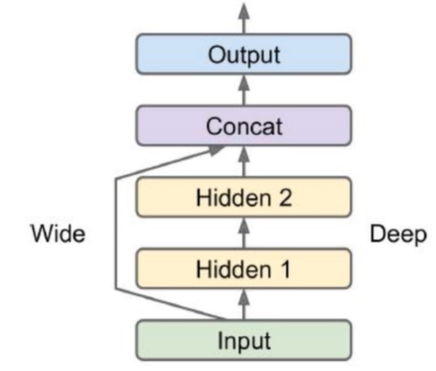

In [6]:
#del model
#keras.backend.clear.session()

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() #shift+tab 2 times

In [3]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state= 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_],outputs=[output])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [6]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(learning_rate=1e-3),
             metrics = ["mae"])

In [7]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data =(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - mae: 0.7852 - val_loss: 3.3940 - val_mae: 0.6266
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6580 - mae: 0.5812 - val_loss: 0.9360 - val_mae: 0.5652
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5878 - mae: 0.5550 - val_loss: 0.5649 - val_mae: 0.5328
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5582 - mae: 0.5405 - val_loss: 0.5712 - val_mae: 0.5239
Epoch 5/20
363/363 [==============================] - ETA: 0s - loss: 0.5336 - mae: 0.526 - 1s 1ms/step - loss: 0.5347 - mae: 0.5274 - val_loss: 0.5045 - val_mae: 0.5068
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - mae: 0.5182 - val_loss: 0.4831 - val_mae: 0.4966
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5002 - mae: 0.5097 - val_loss: 0.4639 - val_mae: 0.4890
Epoch 8/20
363/363 [==================

In [8]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 944us/step - loss: 0.4032 - mae: 0.4576


In [9]:
model_history.history

{'loss': [1.2611349821090698,
  0.658014714717865,
  0.5878487825393677,
  0.558220624923706,
  0.5347447395324707,
  0.5158383250236511,
  0.5001887083053589,
  0.48763012886047363,
  0.47597867250442505,
  0.46589067578315735,
  0.45765236020088196,
  0.4497882127761841,
  0.44278815388679504,
  0.43657398223876953,
  0.430705726146698,
  0.42567917704582214,
  0.42097708582878113,
  0.4166797995567322,
  0.41208985447883606,
  0.40877118706703186],
 'mae': [0.7852439880371094,
  0.5811693072319031,
  0.5550118684768677,
  0.5404617190361023,
  0.5273921489715576,
  0.5182088613510132,
  0.5097267031669617,
  0.5028261542320251,
  0.49702101945877075,
  0.4920451045036316,
  0.48688802123069763,
  0.4825677275657654,
  0.47925591468811035,
  0.47540441155433655,
  0.47231706976890564,
  0.4694118797779083,
  0.4662294387817383,
  0.46371427178382874,
  0.460562527179718,
  0.45867958664894104],
 'val_loss': [3.3939738273620605,
  0.9359976053237915,
  0.5649250745773315,
  0.57124257

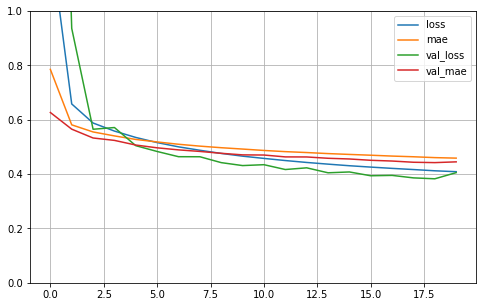

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving and Restoring

In [26]:
model.save("my_Func_model.h5")

In [27]:
del model
keras.backend.clear_session()
model = keras.models.load_model("my_Func_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


# Using Callbacks during Training  

In [49]:
del model
keras.backend.clear_session()

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [51]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate = 1e-3))

In [52]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [53]:
history = model.fit(X_train, y_train,epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.2294 - val_loss: 1.1040
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9288 - val_loss: 0.8594
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7746 - val_loss: 0.6903
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7026 - val_loss: 0.6459
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6540 - val_loss: 0.6275
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6132 - val_loss: 0.5565
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5792 - val_loss: 0.5317
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5499 - val_loss: 0.5727
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5231 - val_loss: 0.4770
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5006 - val_loss: 0.4698

In [54]:
del model
keras.backend.clear_session()

In [56]:
model = keras.models.load_model("Model-10.h5")

In [57]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 894us/step - loss: 0.4828


## Best Model Only

In [58]:
del model
keras.backend.clear_session()

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [60]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate = 1e-3))

In [61]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only = True)

In [62]:
history = model.fit(X_train, y_train,epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6171 - val_loss: 1.9125
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7372 - val_loss: 0.8365
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6600 - val_loss: 0.6570
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6074 - val_loss: 0.5552
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5664 - val_loss: 0.5176
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5318 - val_loss: 0.4868
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5047 - val_loss: 0.4626
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4825 - val_loss: 0.4527
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4647 - val_loss: 0.4393
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4505 - val_loss: 0.4319

## Best Model Only (Early Stopping)


In [63]:
del model
keras.backend.clear_session()

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [65]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate = 1e-3))

In [66]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only = True)

In [67]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True) 
#Patience: Number of epochs with no improvement after which training will be stopped

In [68]:
history = model.fit(X_train, y_train,epochs = 200,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 1.4136 - val_loss: 0.7067
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6676 - val_loss: 0.6484
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6143 - val_loss: 0.5763
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5729 - val_loss: 0.5282
Epoch 5/200
363/363 [==============================] - 1s 3ms/step - loss: 0.5409 - val_loss: 0.4999
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5132 - val_loss: 0.4732
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4918 - val_loss: 0.4484
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4738 - val_loss: 0.4434
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4587 - val_loss: 0.4290
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.4468 - val_lo

In [69]:
model = keras.models.load_model("early_stop_model.h5")

In [70]:
ms0_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4321
